In [83]:
from cdl_helper import read_in_all_matches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = read_in_all_matches()
df = df[~df['matchGame.matchId'].isin(df[df['totalDamageDealt'] == 0]['matchGame.matchId'])]
df = df[~df['matchGame.matchId'].isin(df[df['totalDamageDealt'] == np.nan]['matchGame.matchId'])]
df = df[df['gameMode']=='CDL Hardpoint']
df['totalEngagements'] = df['totalDeaths'] + df['totalKills']
df['place']=1
df.sample(5)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,...,homeTeamGamesWon,awayTeamGamesWon,winnerTeamId,loserTeamId,event,setting,totalHeadshots,totalTiersCaptured,totalEngagements,place
1,Zarqwa Hydroelectric,CDL Hardpoint,38,2,Kenneth,Williams,Kenny,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",200.459656,...,2,3,69,138,M2Qual,online,NaN,NaN,44.0,1
5,Al Bagra Fortress,CDL Hardpoint,363,2,Eli,Bentz,Standy,https://www.callofduty.com/content/dam/activis...,[],172.207565,...,3,1,138,17,M3Qual,online,NaN,NaN,42.0,1
30,Zarqwa Hydroelectric,CDL Hardpoint,99,2,Austin,Liddicoat,SlasheR,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",159.256470,...,1,3,138,7,M1Qual,online,NaN,NaN,45.0,1
1,Breenbergh Hotel,CDL Hardpoint,66,2,Lamar,Abedi,Accuracy,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",174.915985,...,3,1,138,16,M1Qual,online,NaN,NaN,46.0,1
29,Al Bagra Fortress,CDL Hardpoint,217,2,Kaden,Stockdale,Exceed,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",192.442032,...,3,1,17,11,M2Event,lan,NaN,NaN,41.0,1


In [84]:
matches = df[['matchGame.matchId', 'abbrev', 'totalKills', 'totalDeaths', 'totalDistanceTraveled', 'untradedKills', 'totalDamageDealt', 'totalEngagements',
              'totalRotationKills', 'team_type', 'gameMap', 'place', 'tradedDeaths']].groupby(['matchGame.matchId', 'abbrev', 'team_type', 'gameMap']).sum().reset_index()
matches.sample(5)

,matchGame.matchId,abbrev,team_type,gameMap,totalKills,totalDeaths,totalDistanceTraveled,untradedKills,totalDamageDealt,totalEngagements,totalRotationKills,place,tradedDeaths
84,8691,SEA,guest,Al Bagra Fortress,90.0,78.0,184736.085938,66.0,10527.0,168.0,17.0,4,27.0
230,8737,FLA,guest,Breenbergh Hotel,89.0,65.0,197744.914062,69.0,10000.0,154.0,19.0,4,22.0
253,8743,LDN,host,Mercado Las Almas,79.0,93.0,229713.734375,55.0,10411.0,172.0,14.0,4,27.0
307,10117,LAG,host,Breenbergh Hotel,74.0,90.0,240419.843750,55.0,9785.0,164.0,16.0,4,22.0
368,10897,LV,host,Breenbergh Hotel,109.0,98.0,244224.148438,83.0,12909.0,207.0,21.0,4,33.0


In [85]:
merged_df = pd.merge(df, matches, how='left', on=['matchGame.matchId', 'abbrev', 'gameMap'], suffixes=('', 'Team'))
merged_df = merged_df[merged_df['placeTeam']==4]
merged_df.sample(2)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,...,team_typeTeam,totalKillsTeam,totalDeathsTeam,totalDistanceTraveledTeam,untradedKillsTeam,totalDamageDealtTeam,totalEngagementsTeam,totalRotationKillsTeam,placeTeam,tradedDeathsTeam
1503,Al Bagra Fortress,CDL Hardpoint,572,2,Daniel,Rothe,Ghosty,https://telescope.callofduty.com/ts/codp/conte...,[],153.367096,...,guest,94.0,66.0,163785.503906,68.0,10759.0,160.0,17.0,4,25.0
389,Embassy,CDL Hardpoint,268,2,Daunte,Gray,Sib,https://www.callofduty.com/content/dam/activis...,[],167.096176,...,guest,100.0,76.0,211879.203125,71.0,11647.0,176.0,23.0,4,24.0


In [86]:
merged_df['hillTimeTeam'] = [gs if tt == 'guest' else hs for gs, tt, hs in zip(merged_df['matchGameResult.guestGameScore'],
                                                                               merged_df['team_type'],
                                                                               merged_df['matchGameResult.hostGameScore'])]

In [87]:
merged_df['percEngagements'] = merged_df['totalEngagements']/merged_df['totalEngagementsTeam']
merged_df['percHillTime'] = merged_df['hillTime']/merged_df['hillTimeTeam']
merged_df['percRotationalKills'] = merged_df['totalRotationKills']/merged_df['totalRotationKillsTeam']
merged_df['percUntradedKills'] = merged_df['untradedKills']/merged_df['untradedKillsTeam']
merged_df['percDamageDealt'] = merged_df['totalDamageDealt']/merged_df['totalDamageDealtTeam']
merged_df['percTotalKills'] = merged_df['totalKills']/merged_df['totalKillsTeam']
merged_df['percTradedDeaths'] = merged_df['tradedDeaths']/merged_df['tradedDeathsTeam']
merged_df['impactRating'] = ((merged_df['percDamageDealt']+merged_df['percHillTime']+merged_df['percRotationalKills']+merged_df['percUntradedKills']+merged_df['percTotalKills']+merged_df['percTradedDeaths'])/5)/0.25
merged_df['percDistanceTraveled'] = merged_df['totalDistanceTraveled']/merged_df['totalDistanceTraveledTeam']

<AxesSubplot:xlabel='percHillTime', ylabel='percEngagements'>

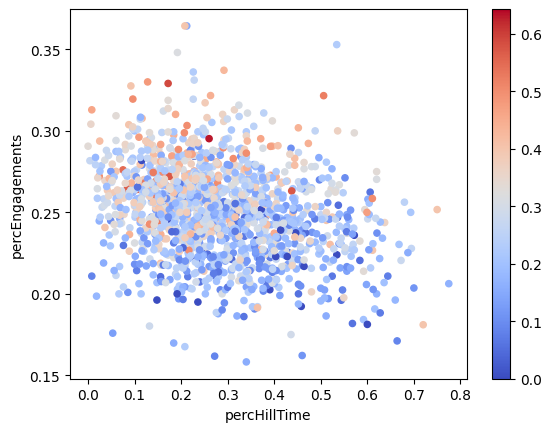

In [88]:
merged_df = merged_df[merged_df['percEngagements'] > 0]
merged_df[['percHillTime', 'percEngagements']].plot(kind='scatter', x='percHillTime', y='percEngagements', c=merged_df['percRotationalKills'], cmap='coolwarm')

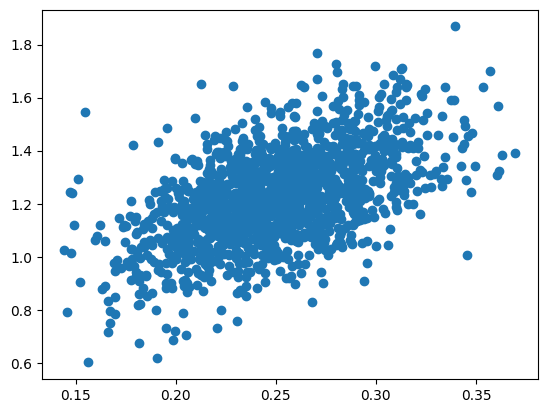

In [89]:
merged_df = merged_df[merged_df['matchGame.matchId'] !=8691]
plt.scatter(merged_df['percDamageDealt'], merged_df['impactRating'])

In [90]:
merged_df.sort_values('impactRating', ascending=False, inplace=True)
merged_df['matchGame.matchId'][:10]

1215     8740
1117     8733
230      8650
387     10118
288      8654
996      8749
1471    10890
1045     8727
402     10115
235      8650
Name: matchGame.matchId, dtype: int64

In [91]:
merged_df.iloc[:10][['alias', 'matchGame.matchId', 'oppo_abbrev', 'gameMap']]

,alias,matchGame.matchId,oppo_abbrev,gameMap
1215,JoeDeceives,8740,FLA,Zarqwa Hydroelectric
1117,Nero,8733,FLA,Breenbergh Hotel
230,Drazah,8650,FLA,Breenbergh Hotel
387,Mack,10118,BOS,Embassy
288,Huke,8654,BOS,Breenbergh Hotel
996,Exceed,8749,TX,Breenbergh Hotel
1471,Scrap,10890,ATL,Breenbergh Hotel
1045,Envoy,8727,ATL,Mercado Las Almas
402,Octane,10115,FLA,Breenbergh Hotel
235,Brack,8650,LAT,Embassy


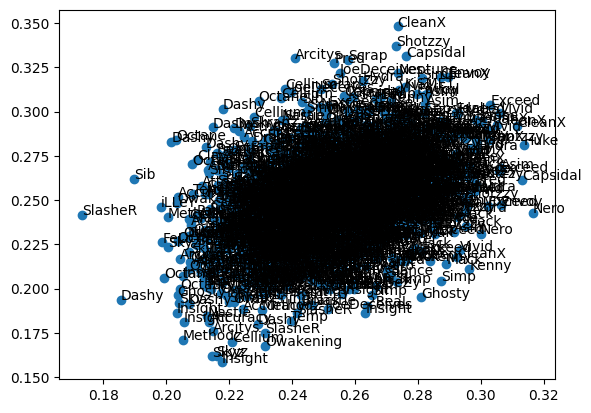

In [92]:
plt.scatter(merged_df['percDistanceTraveled'], merged_df['percEngagements'])
for x, y, name in zip(merged_df['percDistanceTraveled'], merged_df['percEngagements'], merged_df['alias']):
    plt.text(x, y, name)

In [93]:
mean_df = merged_df.groupby('alias').mean().reset_index()
mean_df.sample(2)

,alias,id,programId,averageSpeed,highestStreak,untradedKills,untradedDeaths,tradedKills,tradedDeaths,inapplicableTradedKills,...,hillTimeTeam,percEngagements,percHillTime,percRotationalKills,percUntradedKills,percDamageDealt,percTotalKills,percTradedDeaths,impactRating,percDistanceTraveled
30,Mack,225.0,2.0,184.797005,3.793103,13.793103,15.793103,7.275862,6.551724,0.0,...,226.000000,0.247274,0.294735,0.239896,0.215442,0.230206,0.233971,0.270953,1.188162,0.269387
32,Nastie,426.0,2.0,177.695089,4.333333,16.541667,15.000000,5.833333,6.666667,0.0,...,213.458333,0.246398,0.279123,0.294486,0.258731,0.255065,0.251594,0.262255,1.281004,0.244895


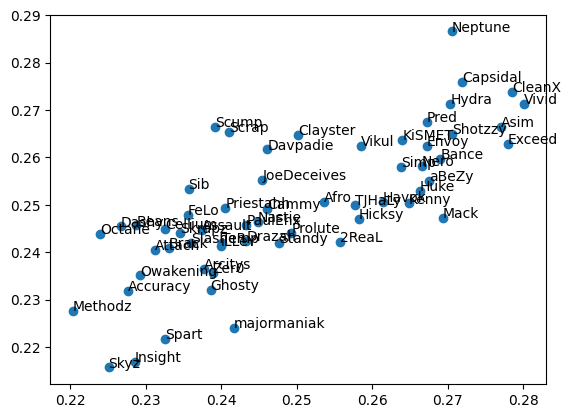

In [94]:
plt.scatter(mean_df['percDistanceTraveled'], mean_df['percEngagements'])
for x, y, name in zip(mean_df['percDistanceTraveled'], mean_df['percEngagements'], mean_df['alias']):
    plt.text(x, y, name)

In [95]:
from cdl_helper import CDL_ROLES
import seaborn as sns

mean_df['role'] = mean_df['alias'].map(CDL_ROLES)
merged_df['role'] = merged_df['alias'].map(CDL_ROLES)

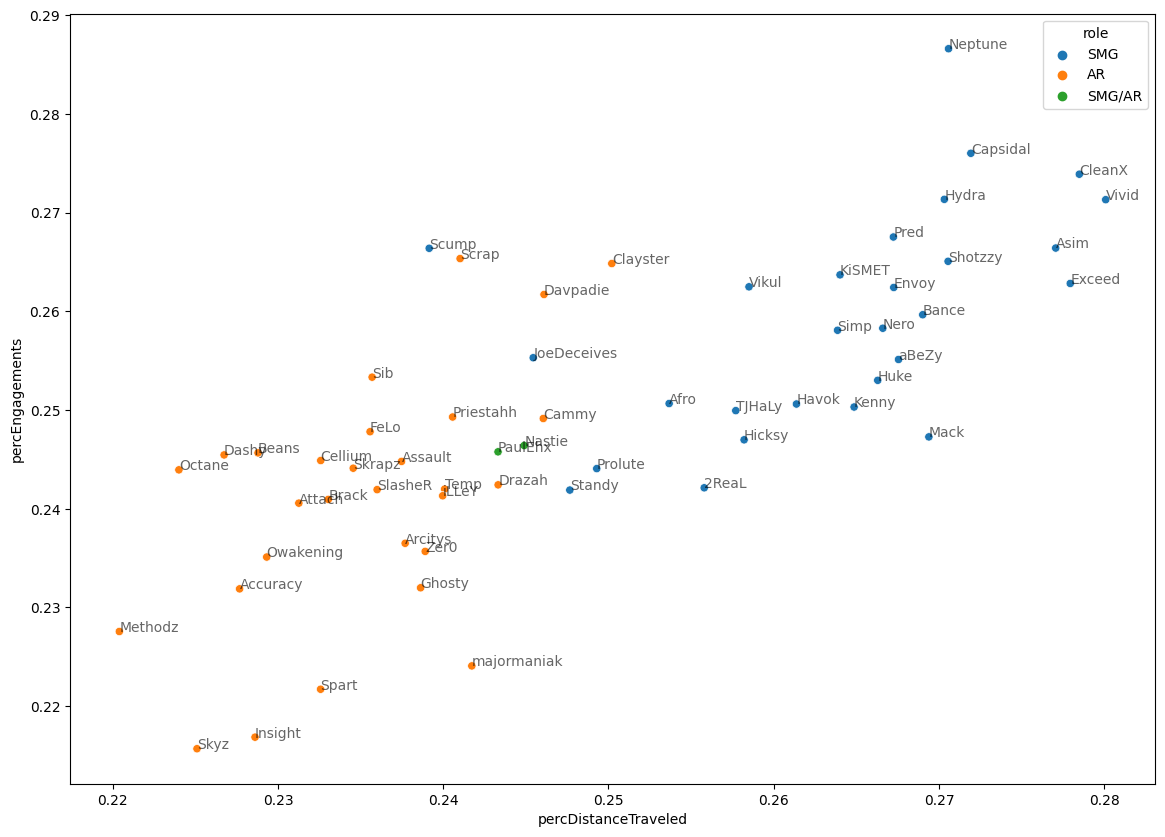

In [96]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=mean_df, x='percDistanceTraveled', y='percEngagements', hue='role')
for x, y, name in zip(mean_df['percDistanceTraveled'], mean_df['percEngagements'], mean_df['alias']):
    plt.text(x, y, name, alpha=0.6)

<AxesSubplot:xlabel='percDistanceTraveled', ylabel='percEngagements'>

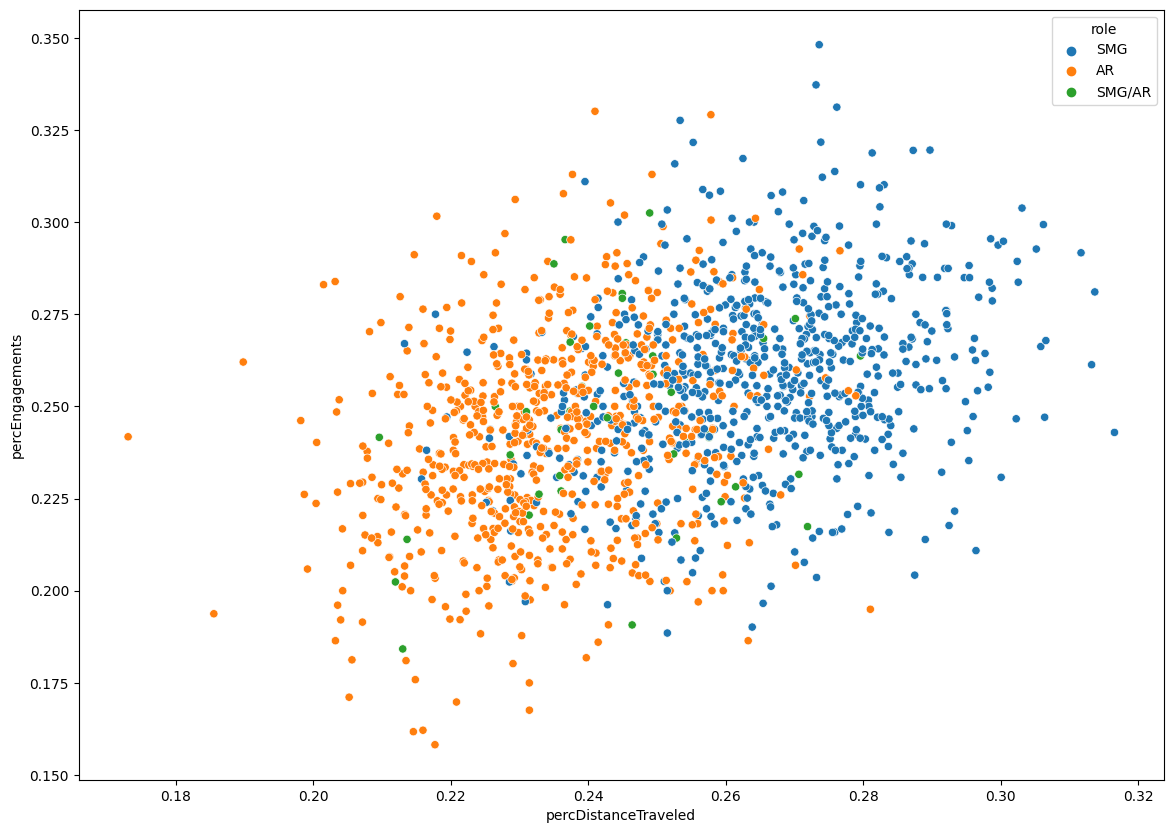

In [97]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=merged_df, x='percDistanceTraveled', y='percEngagements', hue='role')

<AxesSubplot:xlabel='speedScore', ylabel='impactRating'>

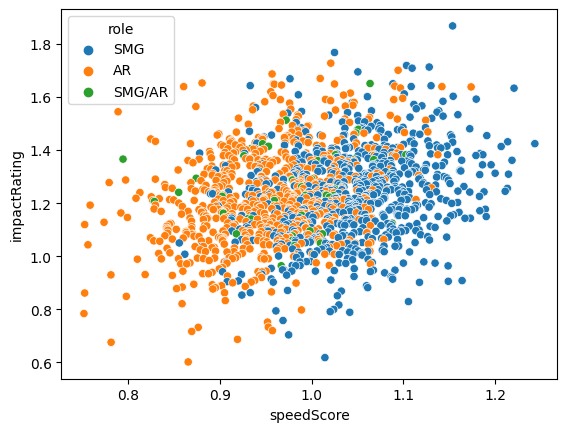

In [98]:
merged_df['speedScore'] = ((merged_df['percDistanceTraveled']+merged_df['percEngagements'])/2)/0.25
sns.scatterplot(data=merged_df, x='speedScore', y='impactRating', hue='role')

Text(0.5, 1.0, 'Season Average Impact Rating vs Speed Rating (Hardpoint)')

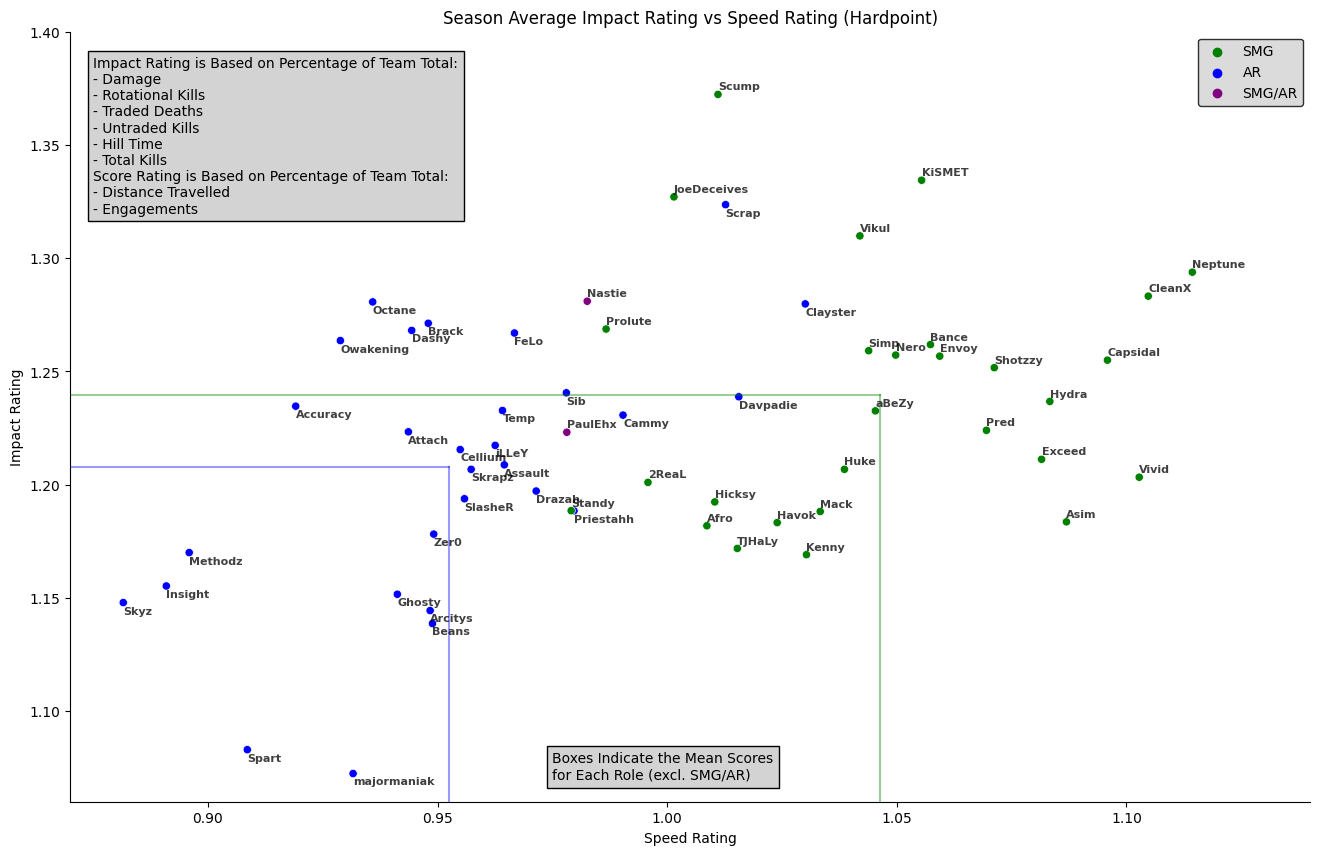

In [99]:
fig = plt.figure(figsize=(16, 10))
ax = fig.subplots()
mean_df = merged_df.groupby(['alias', 'role']).mean().reset_index()
def draw_average(ax, df, textsize):
    sns.scatterplot(data=df, x='speedScore', y='impactRating', hue='role', ax=ax, palette={'AR': 'blue',
                                                                                           'SMG': 'green',
                                                                                           'SMG/AR': 'purple'})
    for x, y, name, role in zip(df['speedScore'], df['impactRating'], df['alias'], df['role']):
        ax.text(x, y-0.005 if role=='AR' else y+0.002, name, alpha=0.75, fontdict={"fontsize":textsize,
                                                                                  "weight": 'bold'})

    ar_speed_mean = df[df['role']=='AR']['speedScore'].mean()
    smg_speed_mean = df[df['role']=='SMG']['speedScore'].mean()
    ar_imp_mean = df[df['role']=='AR']['impactRating'].mean()
    smg_imp_mean = df[df['role']=='SMG']['impactRating'].mean()

    def draw_mean(ax, ymean, xmean, colour):
        placex, placey = ax.get_xlim(), ax.get_ylim()
        ax.plot([xmean, xmean], [ax.get_ylim()[0] ,ymean], color=colour, alpha=0.4)
        ax.plot([ax.get_xlim()[0], xmean], [ ymean,ymean], color=colour, alpha=0.4)
        ax.set_ylim(placey)
        ax.set_xlim(placex)

    draw_mean(ax, ar_imp_mean, ar_speed_mean, 'blue')
    draw_mean(ax, smg_imp_mean, smg_speed_mean, 'green')

    ax.spines[['top', 'right']].set_visible(False)
    ax.set_ylabel("Impact Rating")
    ax.set_xlabel("Speed Rating")
    frame = ax.legend().get_frame()
    frame.set_color('lightgrey')
    frame.set_edgecolor('black')
draw_average(ax, mean_df, 8)
ax.text(0.875, 1.32, "Impact Rating is Based on Percentage of Team Total:\n- Damage\n- Rotational Kills\n- Traded Deaths\n- Untraded Kills\n- Hill Time\n- Total Kills\nScore Rating is Based on Percentage of Team Total:\n- Distance Travelled\n- Engagements",
            bbox={'facecolor':'lightgrey'})
ax.text(0.975, 1.07, "Boxes Indicate the Mean Scores\nfor Each Role (excl. SMG/AR)", bbox={'facecolor':'lightgrey'})
ax.set_xlim([0.87, 1.14])
ax.set_ylim([1.06, 1.4])
ax.set_title("Season Average Impact Rating vs Speed Rating (Hardpoint)")

In [100]:
mean_df[mean_df['alias']=='Davpadie'].iloc[0][-10:]

percEngagements           0.2617
percHillTime            0.179183
percRotationalKills     0.310073
percUntradedKills       0.256672
percDamageDealt         0.268974
percTotalKills           0.25753
percTradedDeaths        0.276085
impactRating            1.238814
percDistanceTraveled    0.246098
speedScore              1.015597
Name: 16, dtype: object

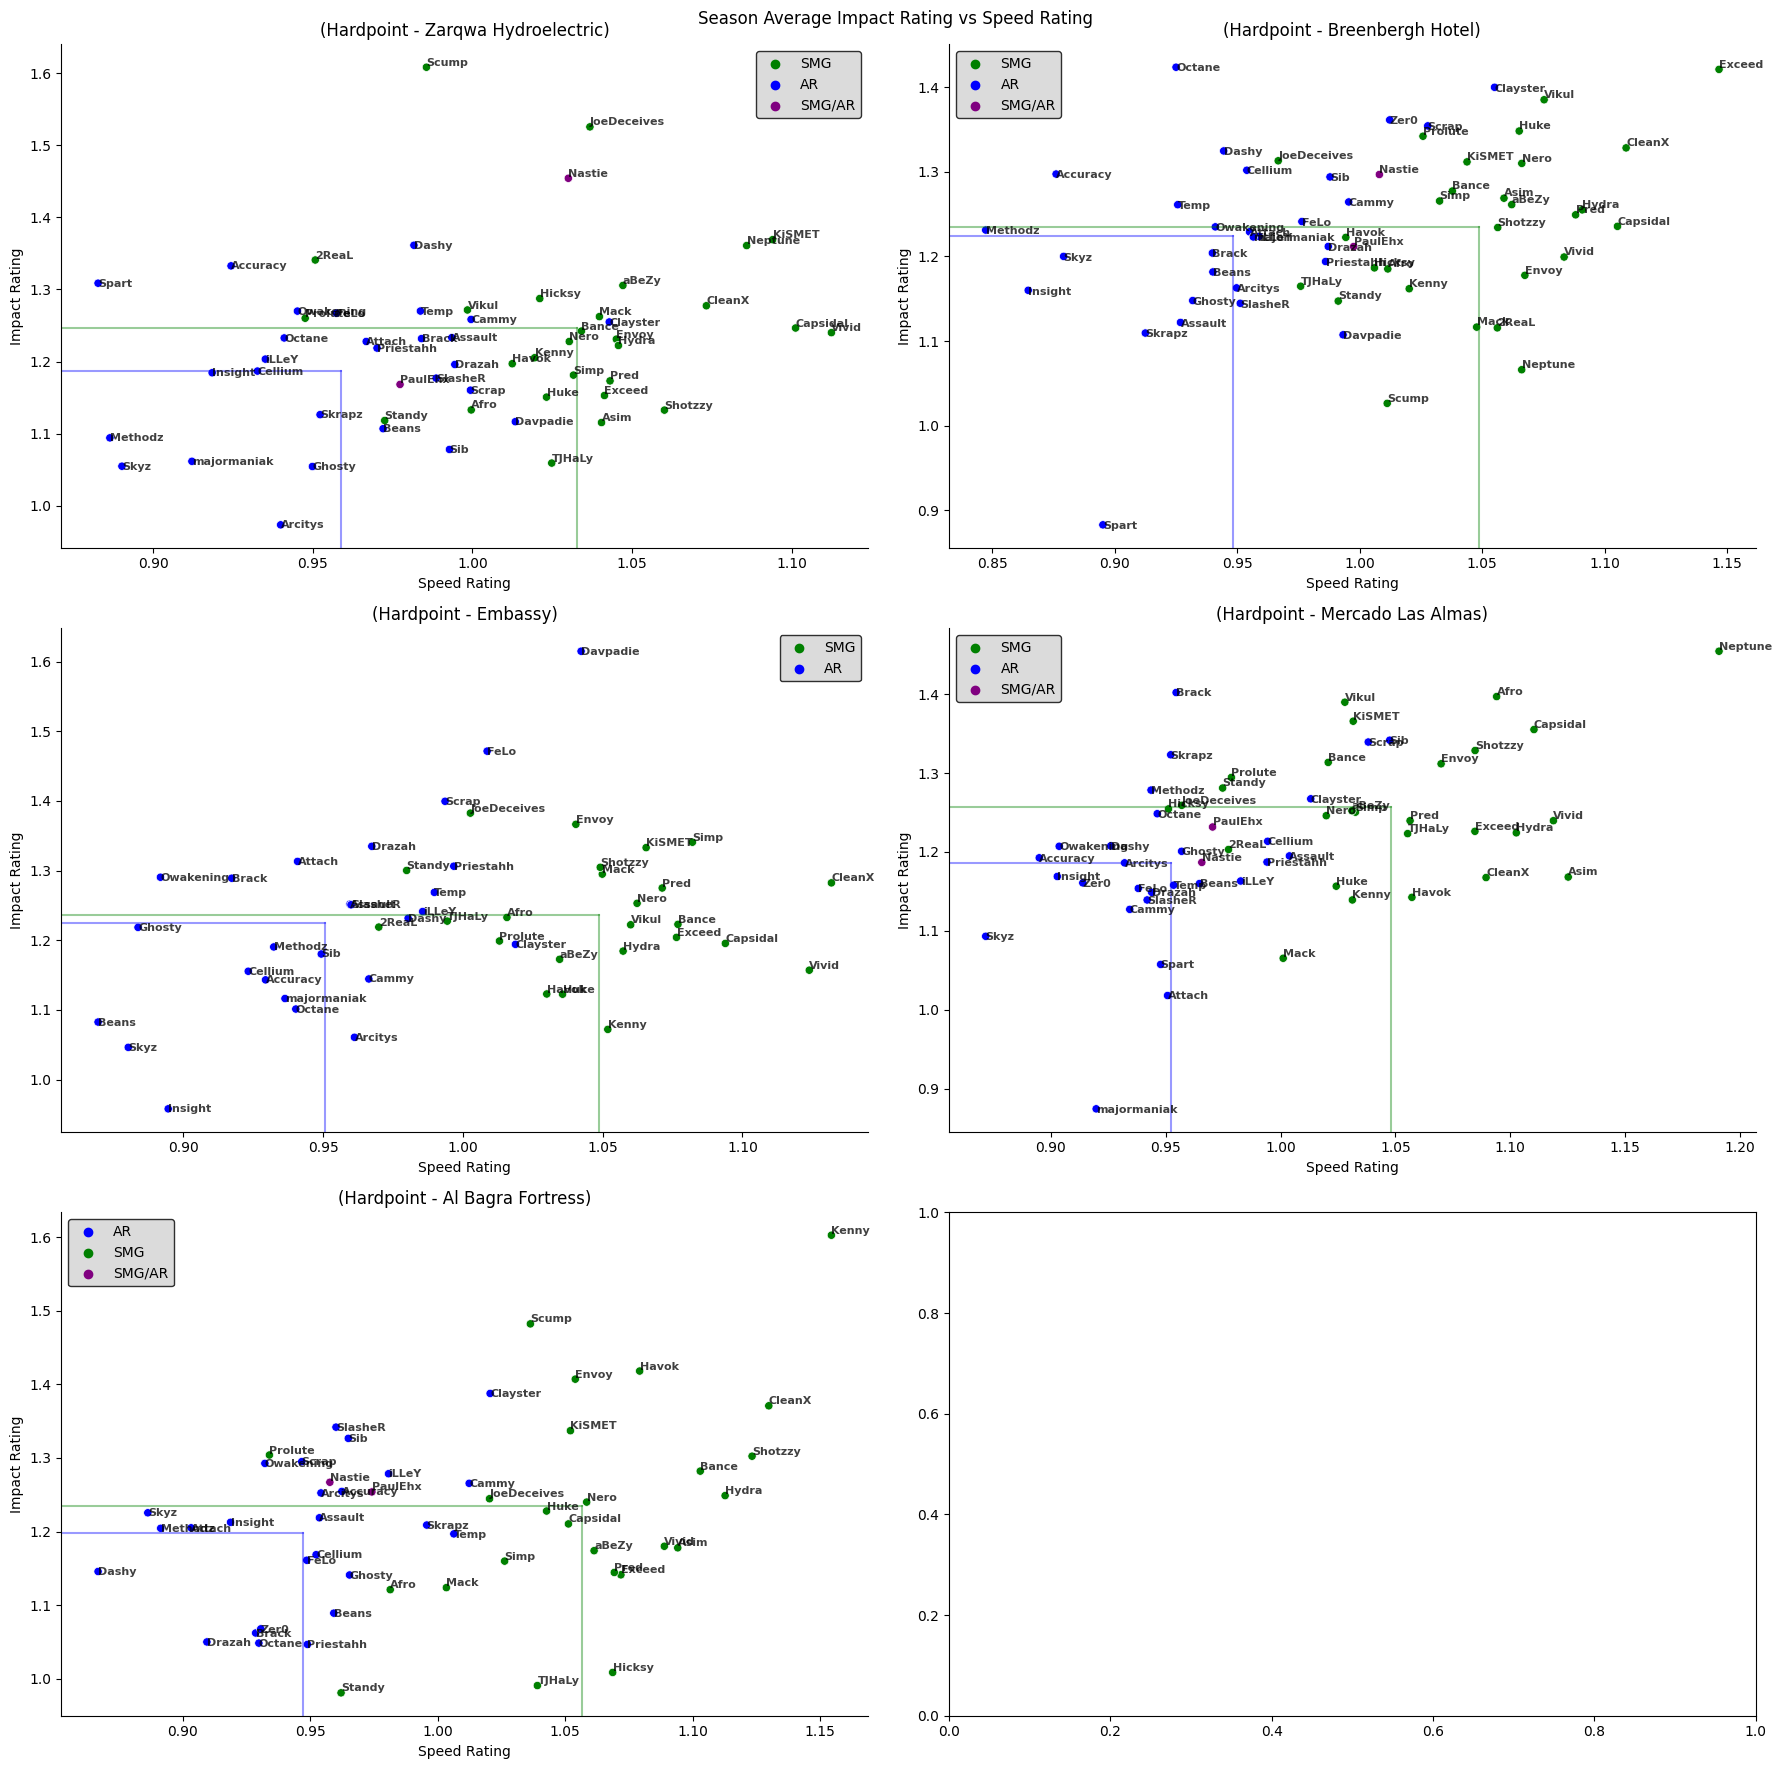

In [101]:
fig = plt.figure(figsize=(18, 18))
((ax1, ax2),(ax3,ax4),(ax5,ax6)) = fig.subplots(ncols=2, nrows=3)
all_axis = [ax1, ax2, ax3, ax4, ax5]
for map, axis in zip(merged_df['gameMap'].unique(), all_axis):
    mean_map_df = merged_df[merged_df['gameMap']==map].groupby(['alias', 'role']).mean().reset_index()
    axis.set_title(f"(Hardpoint - {map})")
    draw_average(axis, mean_map_df, 8)
fig.suptitle("Season Average Impact Rating vs Speed Rating")
fig.tight_layout()

<AxesSubplot:xlabel='gameMap'>

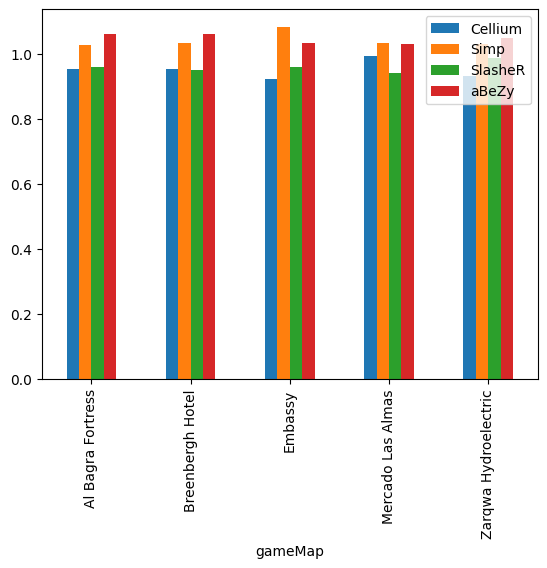

In [102]:
faze_subs = merged_df[merged_df['alias'].isin(['Simp', 'aBeZy', 'Cellium', 'SlasheR'])]
faze_subs =  faze_subs.groupby(['alias', 'gameMap']).mean().reset_index().set_index('gameMap')
faze_subs_speed = faze_subs[['speedScore', 'alias']]
faze_subs_impact = faze_subs[['impactRating', 'alias']]
faze_subs_speed = faze_subs_speed.pivot(columns='alias')
faze_subs_speed.columns = [i[1] for i in faze_subs_speed.columns.values]
faze_subs_speed.plot.bar()


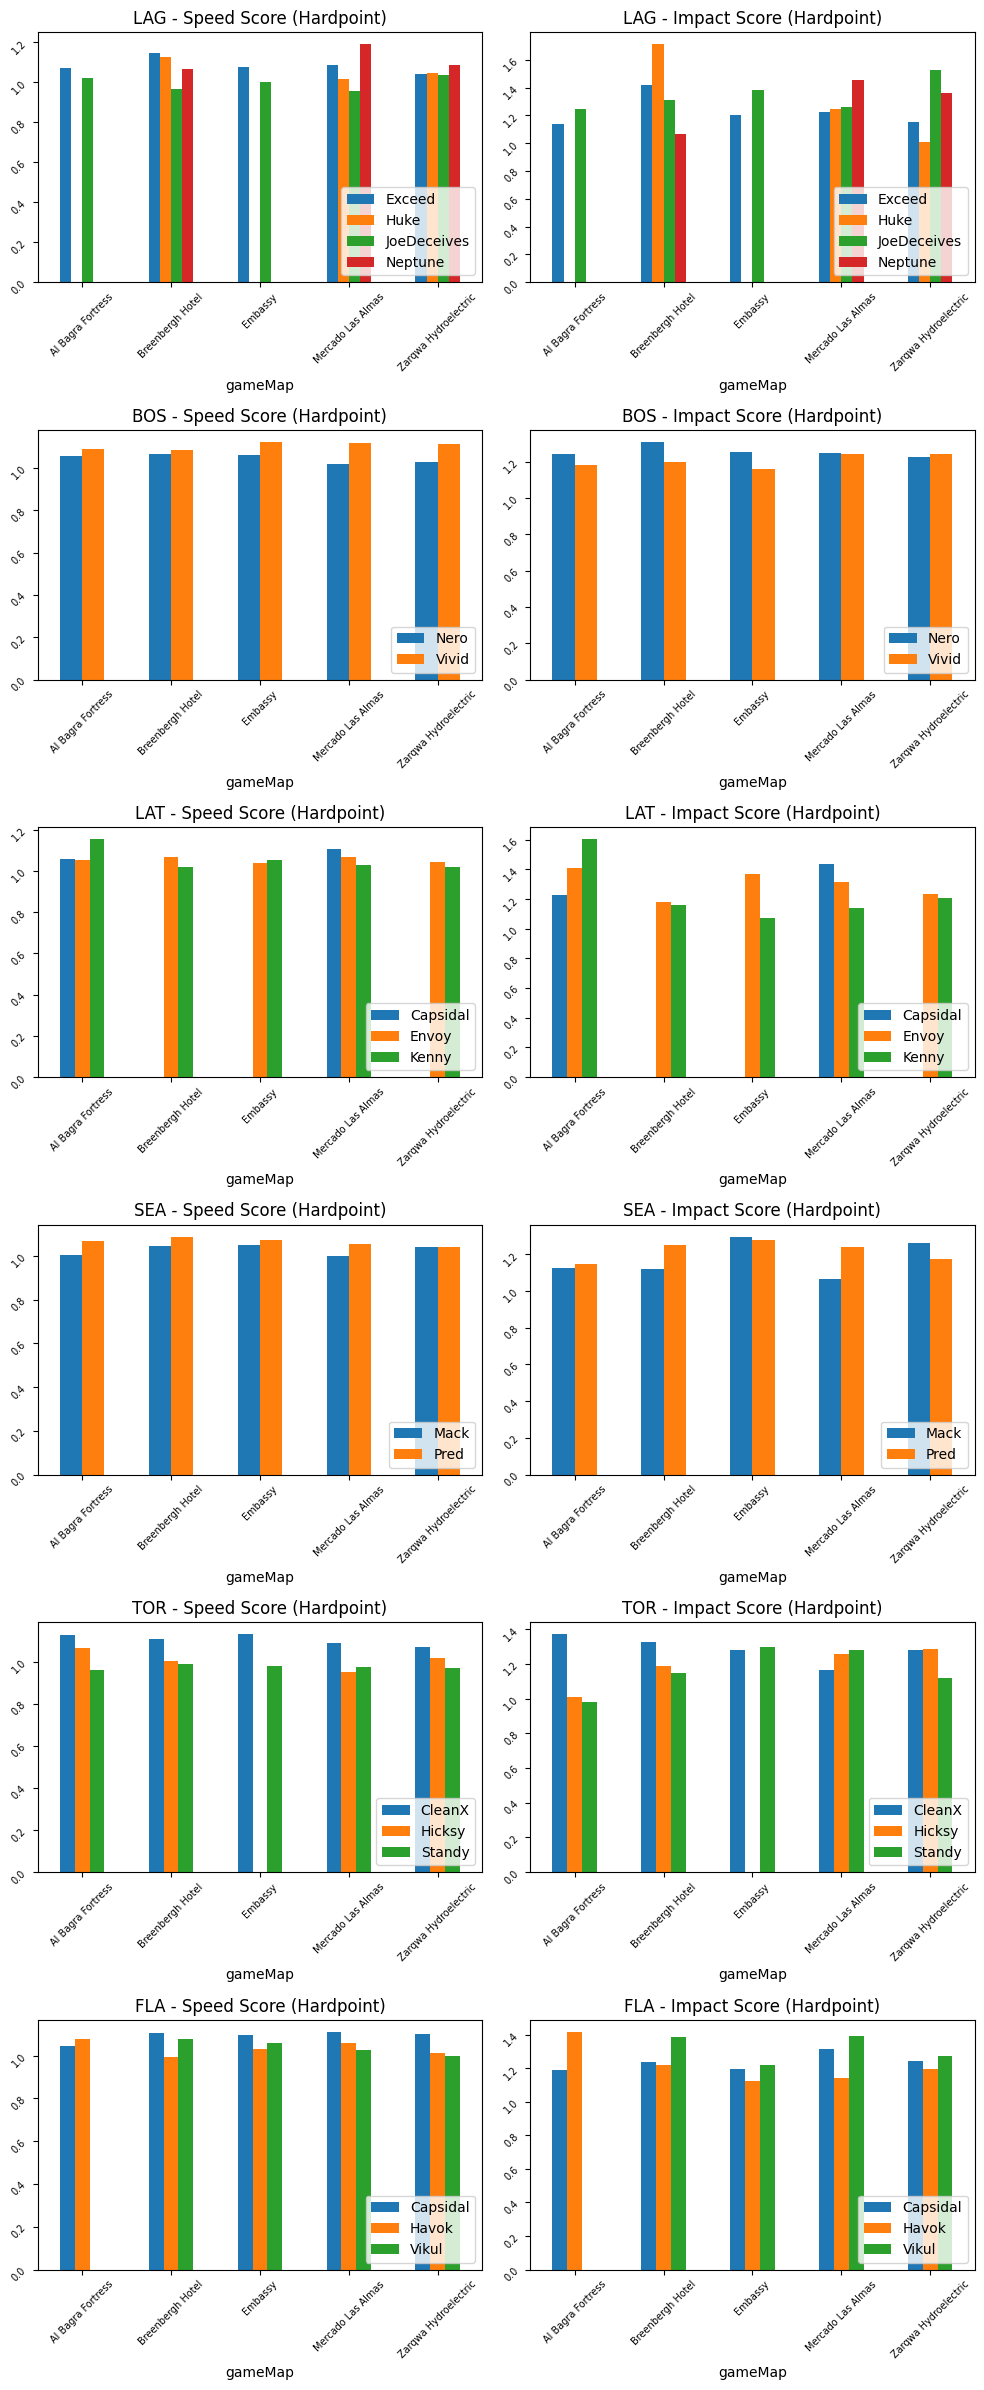

In [103]:
def plot_team_comparison(data, ax1, ax2, teamname):
    data =  data.groupby(['alias', 'gameMap']).mean().reset_index().set_index('gameMap')
    data = data[~data['alias'].isin(['iLLeY', 'Scump'])]
    speed = data[['speedScore', 'alias']]
    impact = data[['impactRating', 'alias']]
    speed = speed.pivot(columns='alias')
    impact = impact.pivot(columns='alias')
    speed.columns = [i[1] for i in speed.columns.values]
    impact.columns = [i[1] for i in impact.columns.values]
    speed.plot.bar(ax=ax1)
    impact.plot.bar(ax=ax2)
    ax1.set_title(f"{teamname} - Speed Score (Hardpoint)")
    ax2.set_title(f"{teamname} - Impact Score (Hardpoint)")

fig = plt.figure(figsize=(10, 24))
all_axis = fig.subplots(ncols=2, nrows=6)
sub_df = merged_df[merged_df['role']=='SMG']
for pair, team in zip(all_axis, merged_df['abbrev'].unique()[:6]):
    plot_team_comparison(sub_df[sub_df['abbrev']==team], ax1=pair[0], ax2=pair[1], teamname=team)
    for ax in pair:
        ax.tick_params(rotation=45, labelsize=7)
        ax.legend(loc='lower right')
fig.tight_layout()


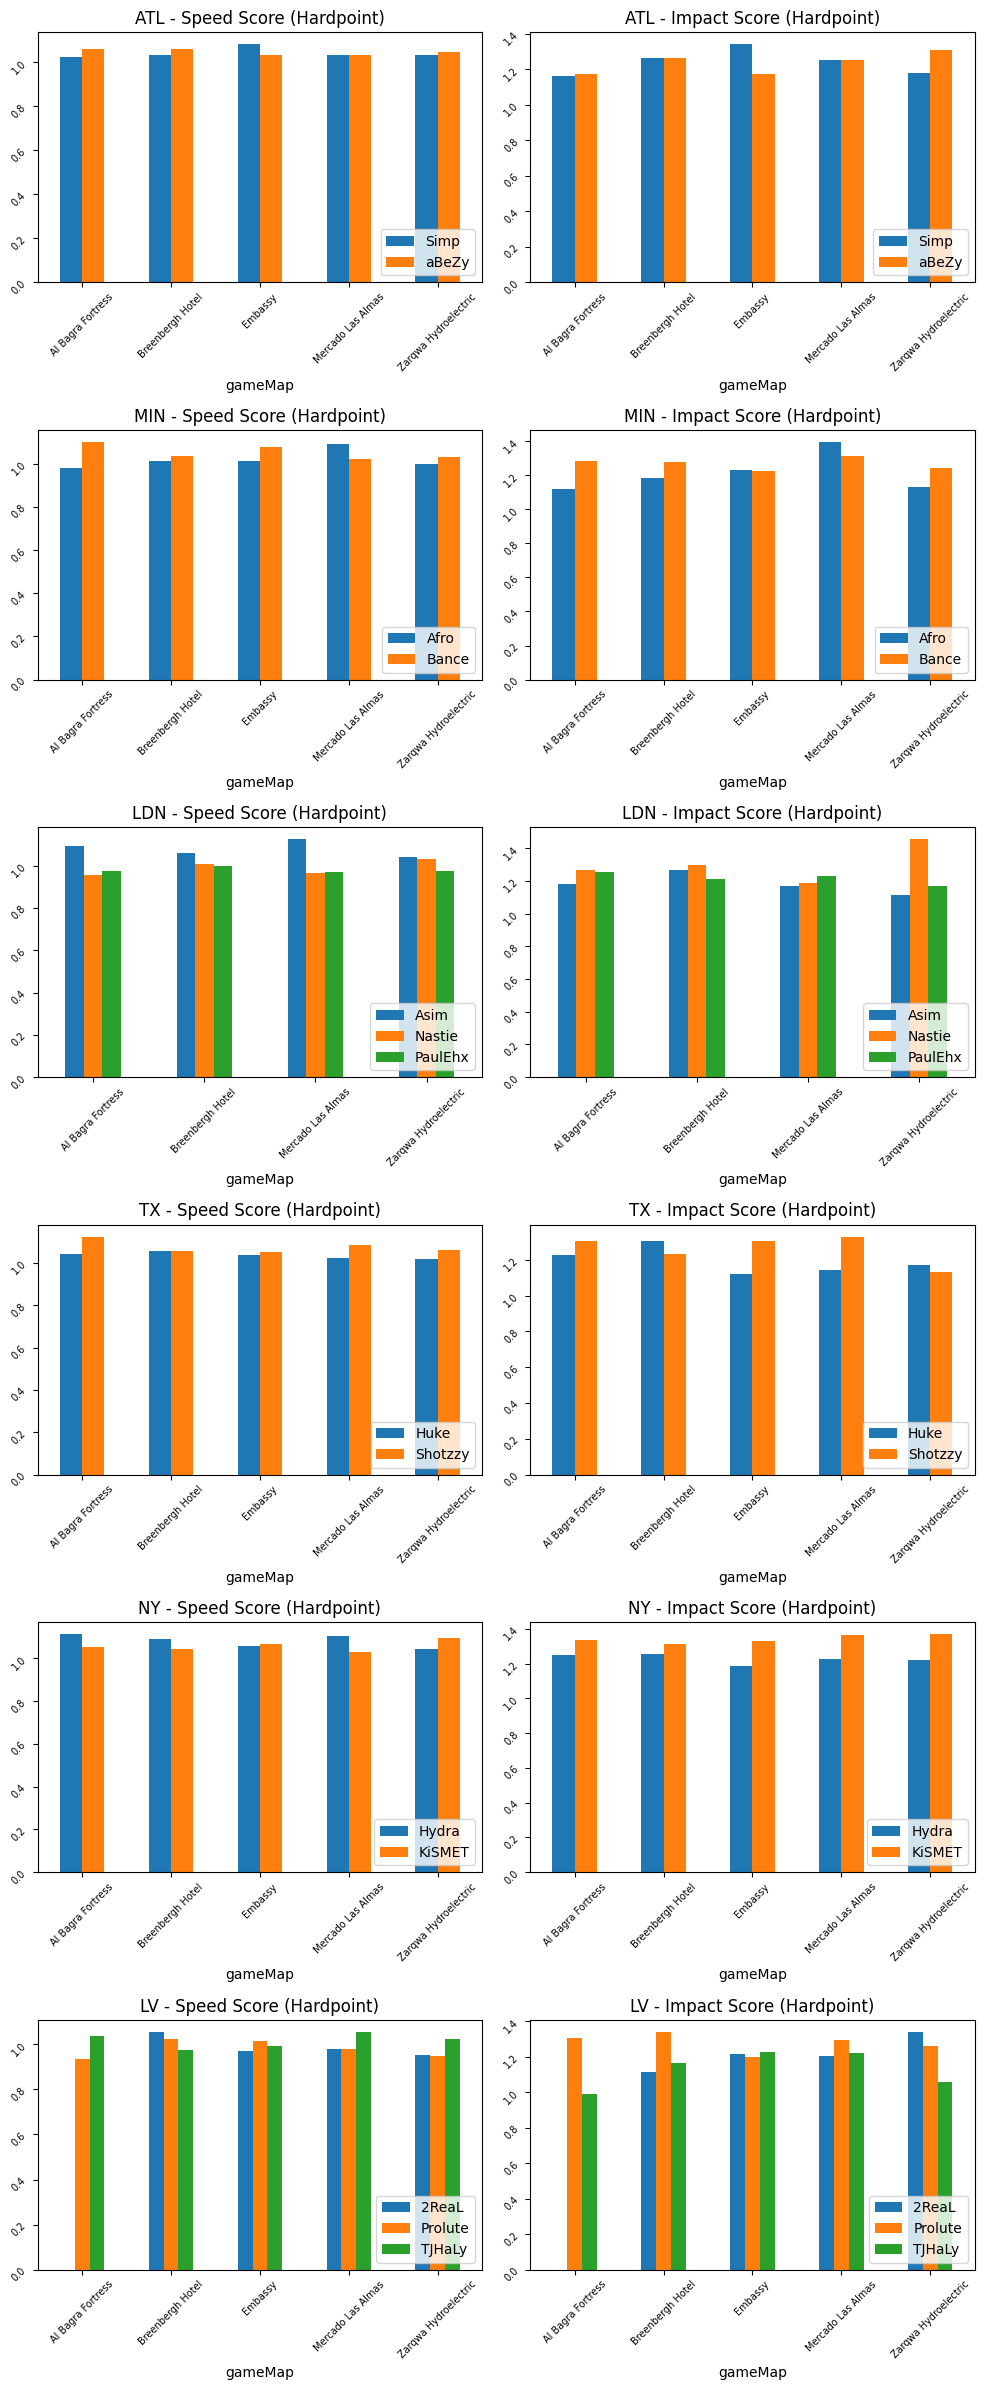

In [104]:
fig = plt.figure(figsize=(10, 24))
all_axis = fig.subplots(ncols=2, nrows=6)
sub_df = merged_df[merged_df['role'].isin(['SMG', 'SMG/AR'])]
for pair, team in zip(all_axis, merged_df['abbrev'].unique()[6:]):
    plot_team_comparison(sub_df[sub_df['abbrev']==team], ax1=pair[0], ax2=pair[1], teamname=team)
    for ax in pair:
        ax.tick_params(rotation=45, labelsize=7)
        ax.legend(loc='lower right')
fig.tight_layout()

In [105]:
setting_df = merged_df.groupby(['alias', 'setting', 'role']).mean().reset_index().set_index('alias')
online = setting_df[setting_df['setting']=='online']
lan = setting_df[setting_df['setting']=='lan']
setting_df = pd.merge(online, lan, how='left', on=['alias', 'role'], suffixes=('Online', 'Lan')).reset_index()[['alias', 'role', 'impactRatingOnline', 'speedScoreOnline', 'impactRatingLan', 'speedScoreLan']]
setting_df['speedScoreChange'] = setting_df['speedScoreLan']-setting_df['speedScoreOnline']
setting_df['impactRatingChange'] = setting_df['impactRatingLan']-setting_df['impactRatingOnline']
setting_df = setting_df[['alias', 'role', 'impactRatingChange', 'speedScoreChange']]
setting_df.sort_values('impactRatingChange', ascending=False).sample(4)

,alias,role,impactRatingChange,speedScoreChange
5,Assault,AR,0.052718,0.002588
28,Kenny,SMG,-0.015015,-0.014285
47,Skyz,AR,-0.018336,-0.003933
12,Cellium,AR,-0.006182,-0.005388


Text(0.057, -0.185, 'Faster Playstyle\nLower Impact')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


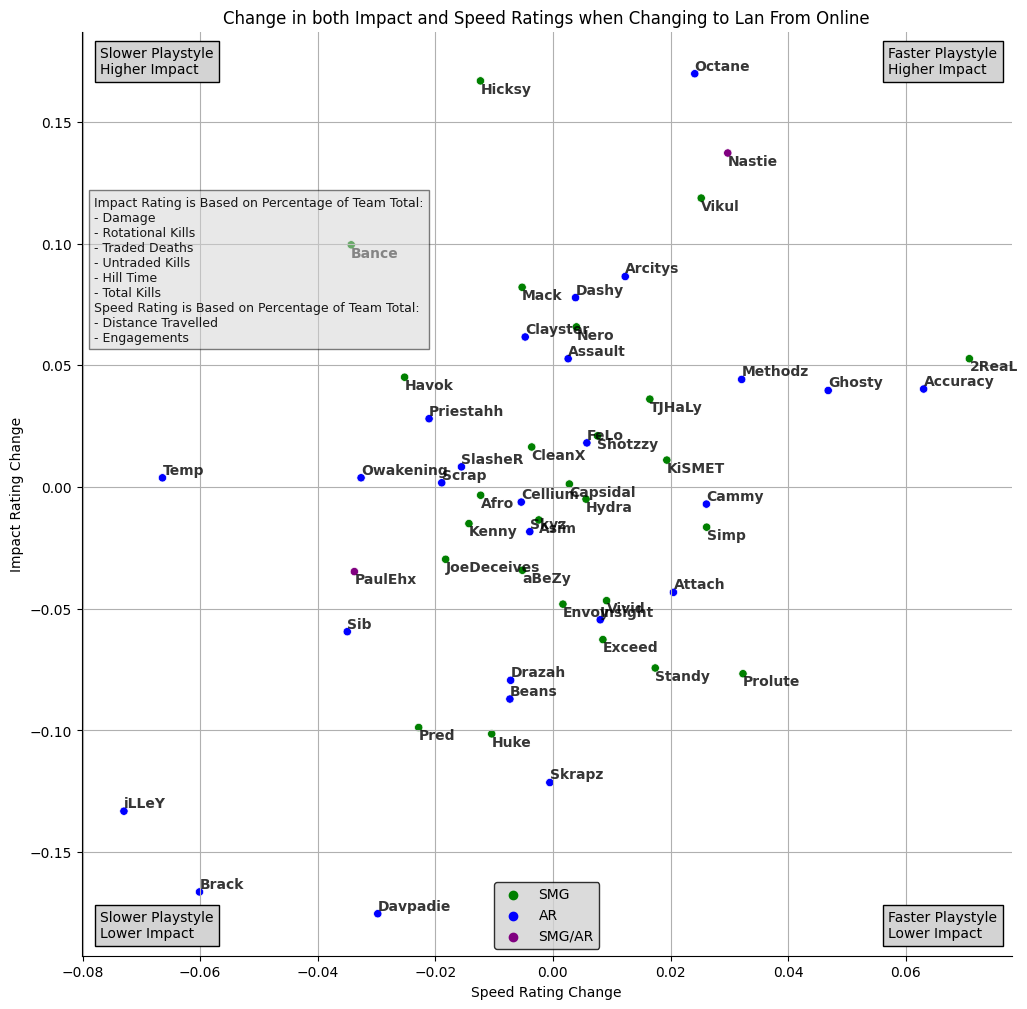

In [160]:
fig = plt.figure(figsize=(12, 12))
ax = fig.subplots()
setting_df = setting_df[setting_df['alias']!='majormaniak']
sns.scatterplot(data=setting_df, x='speedScoreChange', y='impactRatingChange', hue='role', ax=ax, palette={'AR': 'blue',
                                                                                                            'SMG': 'green',
                                                                                                            'SMG/AR': 'purple'})
ax.grid(True)
for x, y, name, role in zip(setting_df['speedScoreChange'], setting_df['impactRatingChange'], setting_df['alias'], setting_df['role']):
    ax.text(x=x, y=y+0.0015 if role == 'AR' else y-0.005, s=name, fontdict={"weight": "bold"}, alpha=0.79)
frame = ax.legend(loc='lower center').get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')
ax.spines[['top', 'right']].set_visible(False)
ax.set_ylabel("Impact Rating Change")
ax.set_xlabel("Speed Rating Change")
ax.set_title("Change in both Impact and Speed Ratings when Changing to Lan From Online")
ax.text(-0.078, 0.06, "Impact Rating is Based on Percentage of Team Total:\n- Damage\n- Rotational Kills\n- Traded Deaths\n- Untraded Kills\n- Hill Time\n- Total Kills\nSpeed Rating is Based on Percentage of Team Total:\n- Distance Travelled\n- Engagements",
            bbox={'facecolor':'lightgrey',
                  'alpha':0.5}, fontdict={'fontsize':9}, alpha=0.9)

ax.text(-0.077, 0.17, "Slower Playstyle\nHigher Impact", bbox={'facecolor':'lightgrey'})
ax.text(-0.077, -0.185, "Slower Playstyle\nLower Impact", bbox={'facecolor':'lightgrey'})
ax.text(0.057, 0.17, "Faster Playstyle\nHigher Impact", bbox={'facecolor':'lightgrey'})
ax.text(0.057, -0.185, "Faster Playstyle\nLower Impact", bbox={'facecolor':'lightgrey'})
